In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Colab\ Notebooks/Fuel_Consumption_2000-2022.csv
!pwd

'/content/drive/MyDrive/Colab Notebooks/Fuel_Consumption_2000-2022.csv'
/content


Loading the data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fuel_Consumption_2000-2022.csv")

Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
#performing one-hot encoding on the 'FUEL' column
fuel_binary = pd.get_dummies(df['FUEL'], prefix='FUEL')
df = pd.concat([df, fuel_binary], axis=1)

df.head()


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,False,False,False,True,False
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,False,False,False,True,False
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,False,False,False,False,True
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,False,False,False,False,True
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,False,False,False,True,False


In [6]:
columns_to_drop = ['MODEL', 'YEAR', 'MAKE', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']
df = df.drop(columns=[c for c in columns_to_drop if c in df.columns])
df.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,1.6,4,9.2,6.7,8.1,35,186,False,False,False,True,False
1,1.6,4,8.5,6.5,7.6,37,175,False,False,False,True,False
2,3.2,6,12.2,7.4,10.0,28,230,False,False,False,False,True
3,3.5,6,13.4,9.2,11.5,25,264,False,False,False,False,True
4,1.8,4,10.0,7.0,8.6,33,198,False,False,False,True,False


In [7]:
#dropping duplicate columns
duplicate_columns = df.columns[df.T.duplicated()]
df = df.loc[:, ~df.T.duplicated()]

print("Dropped duplicate columns:", duplicate_columns)

df = df.replace({True: '1'})
df = df.replace({False: '0'})

df.head()
df.info()

Dropped duplicate columns: Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ENGINE SIZE       22556 non-null  float64
 1   CYLINDERS         22556 non-null  int64  
 2   FUEL CONSUMPTION  22556 non-null  float64
 3   HWY (L/100 km)    22556 non-null  float64
 4   COMB (L/100 km)   22556 non-null  float64
 5   COMB (mpg)        22556 non-null  int64  
 6   EMISSIONS         22556 non-null  int64  
 7   FUEL_D            22556 non-null  object 
 8   FUEL_E            22556 non-null  object 
 9   FUEL_N            22556 non-null  object 
 10  FUEL_X            22556 non-null  object 
 11  FUEL_Z            22556 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [8]:
#correlation matrix
correlation_data = df[ : ]
correlation_matrix = correlation_data.corr()
correlation_matrix

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
ENGINE SIZE,1.000000,0.913377,0.821605,0.749394,0.807316,-0.755002,0.821285,-0.069164,0.174129,0.057354,-0.157984,0.097040
CYLINDERS,0.913377,1.000000,0.794943,0.698344,0.771587,-0.714215,0.802176,-0.052240,0.133384,0.038767,-0.267533,0.223170
FUEL CONSUMPTION,0.821605,0.794943,1.000000,0.942351,0.992960,-0.921361,0.919101,-0.103031,0.430400,0.068452,-0.259316,0.096329
HWY (L/100 km),0.749394,0.698344,0.942351,1.000000,0.975014,-0.884744,0.894781,-0.094521,0.443850,0.079022,-0.174100,0.001240
COMB (L/100 km),0.807316,0.771587,0.992960,0.975014,1.000000,-0.920915,0.922983,-0.101238,0.440619,0.073068,-0.232726,0.064160
COMB (mpg),-0.755002,-0.714215,-0.921361,-0.884744,-0.920915,1.000000,-0.901844,0.121950,-0.302072,-0.050688,0.230524,-0.128433
EMISSIONS,0.821285,0.802176,0.919101,0.894781,0.922983,-0.901844,1.000000,-0.039562,0.077153,0.040487,-0.173060,0.148482
FUEL_D,-0.069164,-0.052240,-0.103031,-0.094521,-0.101238,0.121950,-0.039562,1.000000,-0.026528,-0.004548,-0.124693,-0.099666
FUEL_E,0.174129,0.133384,0.430400,0.443850,0.440619,-0.302072,0.077153,-0.026528,1.000000,-0.008546,-0.234310,-0.187283
FUEL_N,0.057354,0.038767,0.068452,0.079022,0.073068,-0.050688,0.040487,-0.004548,-0.008546,1.000000,-0.040171,-0.032108


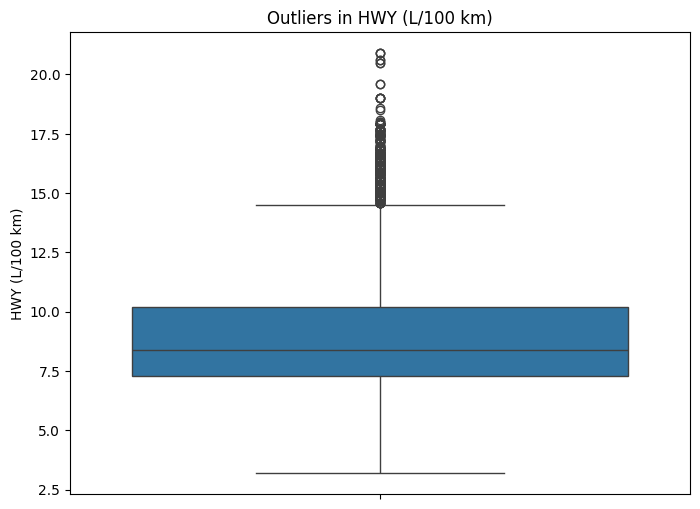

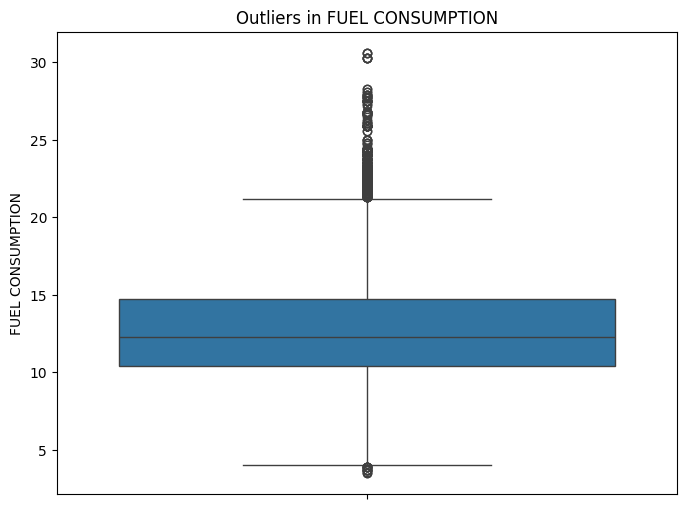

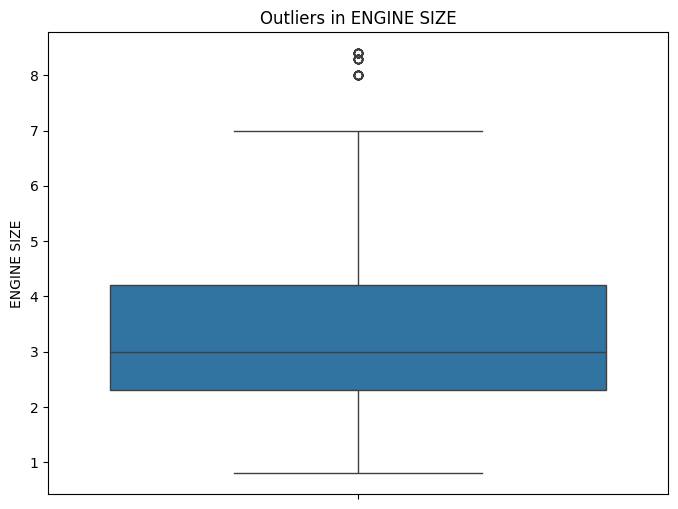

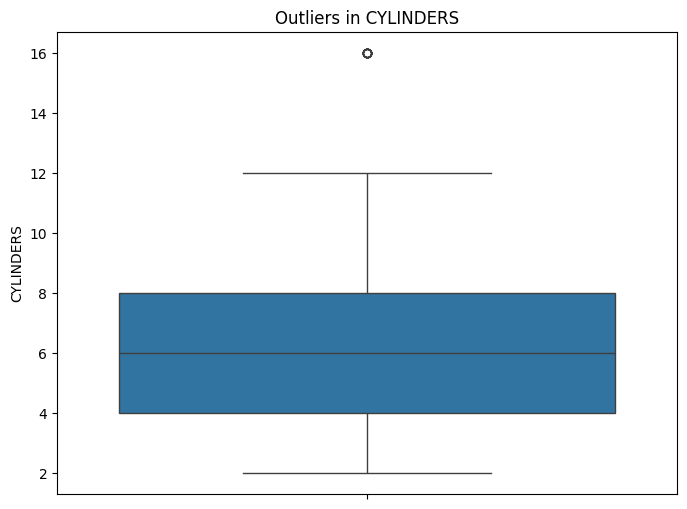

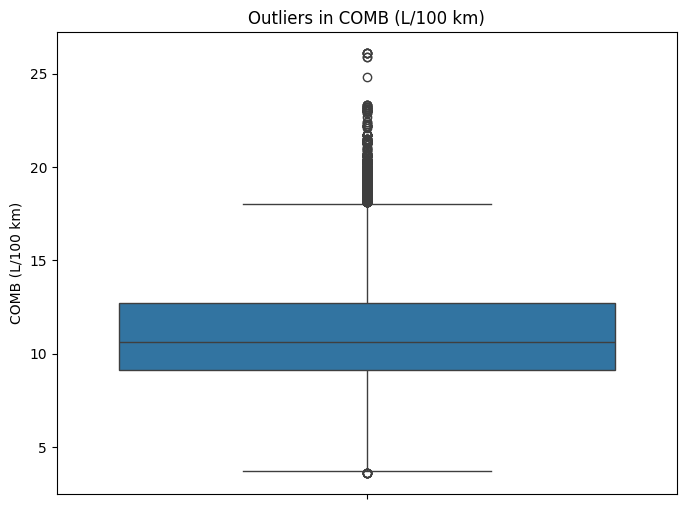

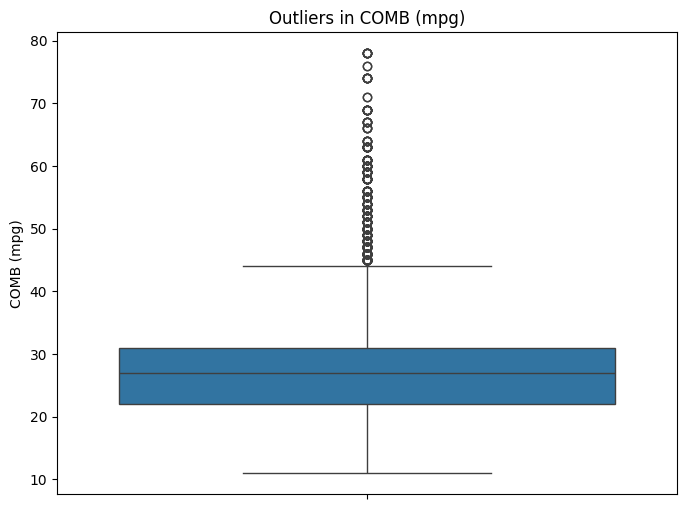

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['HWY (L/100 km)', 'FUEL CONSUMPTION', 'ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'COMB (mpg)']

for i in columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[i])
        plt.title(f'Outliers in {i}')
        plt.show()


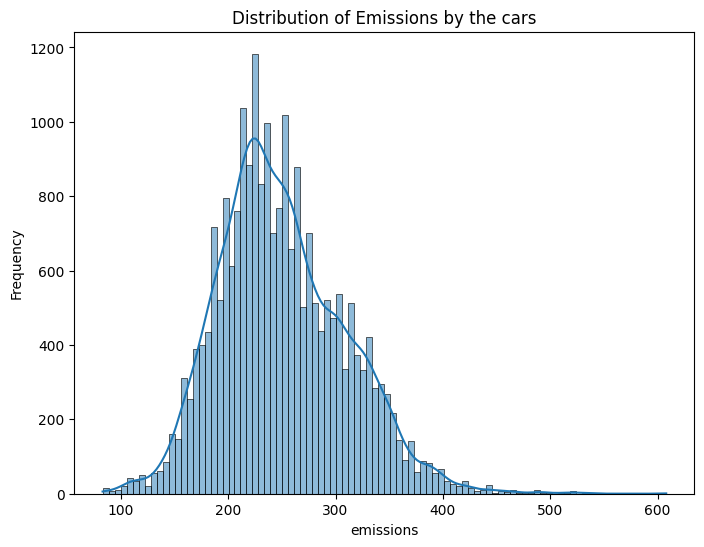

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['EMISSIONS'].dropna(), kde=True)
plt.title("Distribution of Emissions by the cars")
plt.xlabel("emissions")
plt.ylabel("Frequency")
plt.show()

modelling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

df= pd.DataFrame(df_standardized, columns=df.columns)

In [14]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df.drop(columns=['EMISSIONS'])
y = df['EMISSIONS']
results = {
    'Regression Tree': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Ridge Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Lasso Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Principal Component Regression (PCR)': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Regression Splines': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Support Vector Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []}
}
num_features = X.shape[1]

for _ in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(StandardScaler(), PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression': SVR()
    }

    for model_name, model in models.items():


        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)


        results[model_name]['Test MSE'].append(mse)
        results[model_name]['Test RMSE'].append(rmse)
        results[model_name]['Test RSE'].append(rse)
        results[model_name]['Test RSS'].append(rss)
        results[model_name]['Test R^2'].append(r2)

average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}
results_df = pd.DataFrame(average_results)
results_df


,Regression Tree,Ridge Regression,Lasso Regression,Principal Component Regression (PCR),Regression Splines,Support Vector Regression
Test MSE,0.001517,0.006582,1.000100,0.006578,3.319835e+10,0.003709
Test RMSE,0.038880,0.081111,1.000016,0.081089,6.350377e+04,0.060690
Test RSE,0.038915,0.081183,1.000904,0.081161,6.356015e+04,0.060744
Test RSS,10.268114,44.540776,6767.679100,44.516408,2.246532e+14,25.102144
Test R^2,0.998482,0.993418,-0.000178,0.993422,-3.308630e+10,0.996291


Cross-validation and Hyper-**parameter** tuning

Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 0.01}
Ridge Regression - Metrics: {'MSE': 0.0065766253897272565, 'RMSE': 0.08109639566421714, 'RSE': 0.08116839602968468, 'RSS': 44.50402401228435, 'R²': 0.9932564472071046}



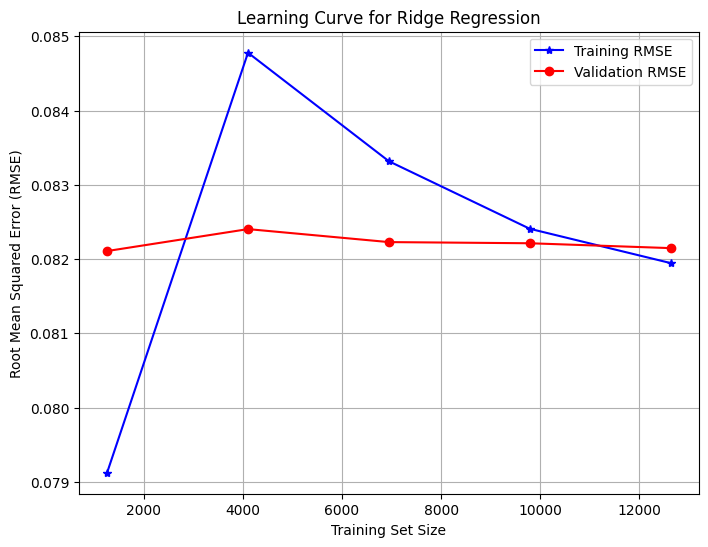

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 0.007273759907937129, 'RMSE': 0.08528634068792687, 'RSE': 0.08536206104083065, 'RSS': 49.22153329701055, 'R²': 0.9925416180738167}



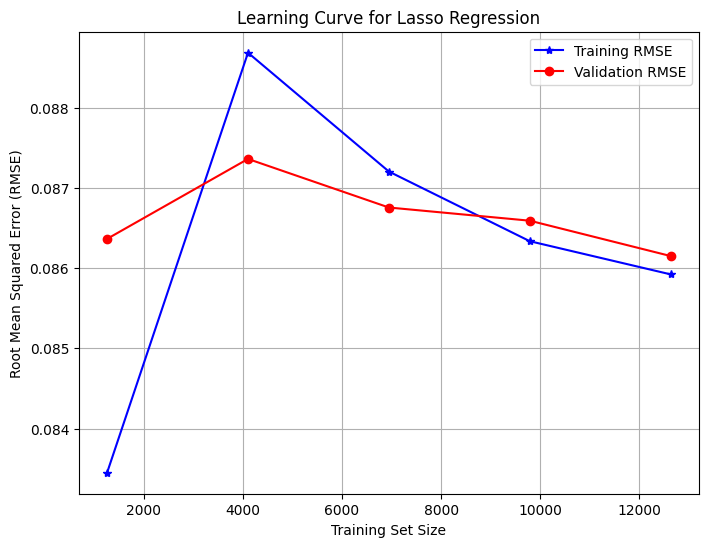

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 11}
Principal Component Regression (PCR) - Metrics: {'MSE': 0.0065767516582473816, 'RMSE': 0.08109717416930988, 'RSE': 0.0811691752259629, 'RSS': 44.50487847136003, 'R²': 0.9932563177336465}



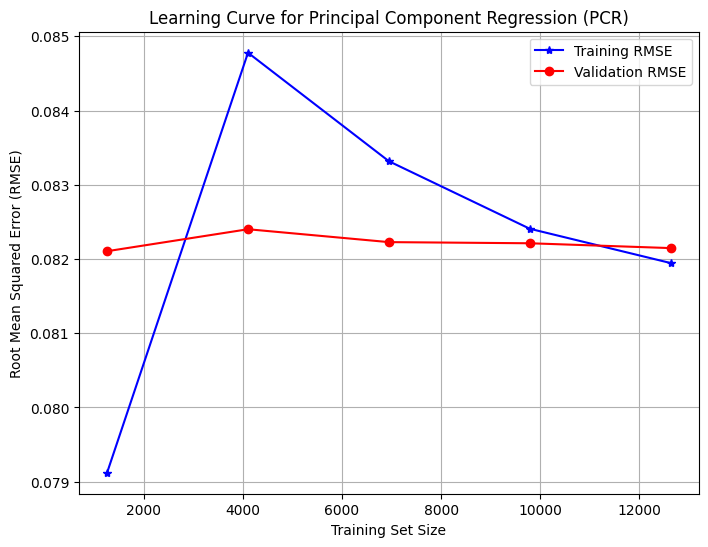

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 0.0015449309504012546, 'RMSE': 0.03930560965563636, 'RSE': 0.03934050662284373, 'RSS': 10.454547741365289, 'R²': 0.998415855730253}



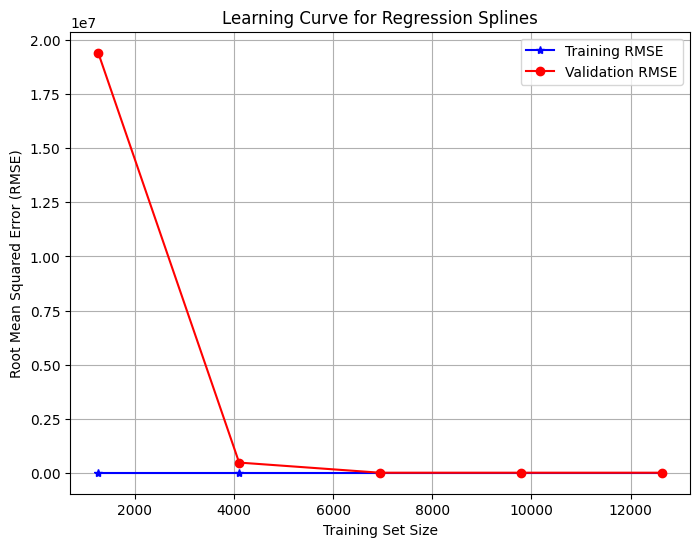

Running GridSearchCV for Regression Tree...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 8, 'decisiontreeregressor__min_samples_split': 20}
Regression Tree - Metrics: {'MSE': 0.015352360990558856, 'RMSE': 0.12390464474973832, 'RSE': 0.12401465185464154, 'RSS': 103.88942682311178, 'R²': 0.9842579665557452}



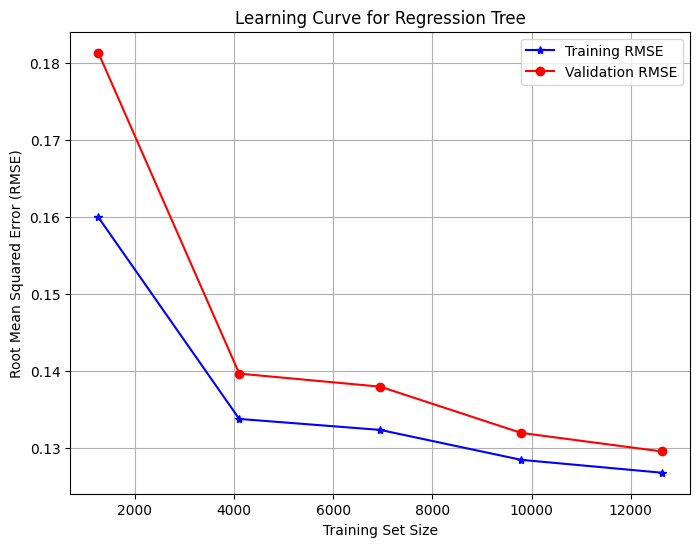

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 10, 'svr__epsilon': 0.1}
Support Vector Regression (SVR) - Metrics: {'MSE': 0.002839595464900102, 'RMSE': 0.05328785475978651, 'RSE': 0.053335165678924906, 'RSS': 19.215542510978988, 'R²': 0.9970883301399635}



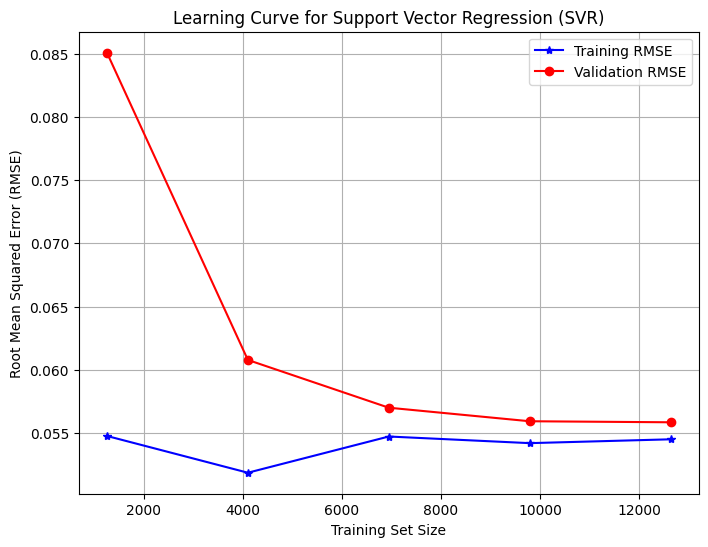


Model Performance Metrics:
                                           MSE      RMSE       RSE  \
Ridge Regression                      0.006577  0.081096  0.081168   
Lasso Regression                      0.007274  0.085286  0.085362   
Principal Component Regression (PCR)  0.006577  0.081097  0.081169   
Regression Splines                    0.001545  0.039306  0.039341   
Regression Tree                       0.015352  0.123905  0.124015   
Support Vector Regression (SVR)       0.002840  0.053288  0.053335   

                                             RSS        R²  
Ridge Regression                       44.504024  0.993256  
Lasso Regression                       49.221533  0.992542  
Principal Component Regression (PCR)   44.504878  0.993256  
Regression Splines                     10.454548  0.998416  
Regression Tree                       103.889427  0.984258  
Support Vector Regression (SVR)        19.215543  0.997088  

Best Parameters for Each Model:
Ridge Regression: {'r

In [15]:
X = df.drop(columns=['EMISSIONS'])
y = df['EMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X_train_scaled.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
        'decisiontreeregressor__max_depth': [3, 4, 5],
        'decisiontreeregressor__min_samples_split': [10, 15, 20],
        'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
    },
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}

def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

#function for plotting learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='*', color='blue')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o', color='red')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()
results = {}
best_parameters = {}
#iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_parameters[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    #calculating performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

#parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")
